# Introduction

# Challenge Details:

**Objective**: Build a deep learning model for accurate cat image classification.                                               
**Dataset**: Images collected from various sources, potentially with variations in file types, quality, and duplicates.                              
**Steps**: Perform exploratory data analysis (EDA) and data cleaning before training the model. Get ready to dive into the world of cats and deep learning!

# Main tools

Let's start by importing key **TensorFlow** and **Keras** libraries for building and training deep learning models, specifically designed for image classification tasks. These tools include modules for defining neural network layers (such as convolutional and pooling layers), handling image data preprocessing, and performing numerical operations using **NumPy**. We'll use these to construct a **convolutional neural network (CNN)** to classify images of different cat breeds.

In [ ]:
# importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np

This code snippet uses **ImageDataGenerator** from Keras for image preprocessing and mounts Google Drive to access our dataset. We define the target image dimensions (target_size) and batch size (batch_size). By counting the number of images per class in our dataset directory (data_dir), we gain insights into the distribution of images across classes.

We then create a **generator** (train_generator) using **datagen.flow_from_directory** to dynamically load and preprocess batches of images and labels from data_dir. This generator yields batches of images and corresponding labels for training purposes. Within a loop, we demonstrate accessing and processing these batches of data, showcasing how to handle image data efficiently for training a deep learning model.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from google.colab  import drive
drive.mount('/content/drive')

# Define data generator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Define image dimensions and batch size
target_size = (64, 64)
batch_size = 32

# Path to the directory containing subfolders (each representing a class)
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Get list of subfolders (classes)
classes = os.listdir(data_dir)

# Dictionary to store the number of images per class
num_images_per_class = {}

# Iterate over each subfolder and count the number of images
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_path))
    num_images_per_class[class_name] = num_images

# Print the number of images in each subfolder
print("Number of images per class:")
for class_name, num_images in num_images_per_class.items():
    print(f"{class_name}: {num_images}")

# Generate batches of image data
train_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming each subfolder represents a different class
    shuffle=True  # Shuffle the data
)

# Access images and labels
for images, labels in train_generator:
    # 'images' is a batch of images with shape (batch_size, 64, 64, 3)
    # 'labels' is an array of corresponding one-hot encoded labels with shape (batch_size, num_classes)

    # Process your images and labels here
    # Example: You can print the shape of images and labels
    print("Shape of images batch:", images.shape)
    print("Shape of labels batch:", labels.shape)

    # Example: Break the loop after processing one batch
    break


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of images per class:
Cheetah: 398
Cat: 414
Tiger: 411
Lion: 409
Leopard: 394
Found 2026 images belonging to 5 classes.
Shape of images batch: (32, 64, 64, 3)
Shape of labels batch: (32, 5)


**Setting Data Directory and Classes**: We start by defining data_dir as the path to the dataset directory. Within this directory, each subfolder corresponds to a different class of images.

**Retrieving Subfolders (Classes)**: Using os.listdir, we gather a list of subfolders (classes) within data_dir, where each subfolder name represents a unique class.

**Counting Images per Class**: We then iterate through each subfolder (class) to calculate the number of images it contains. This is achieved by counting the files (images) within each subfolder and storing these counts in a dictionary (num_images_per_class).

**Visualizing Class Distribution**: To visualize the distribution of images across classes, we generate a bar chart using matplotlib.pyplot. In this chart, each bar represents a class, and its height corresponds to the number of images in that class.

**Displaying and Summarizing Results**: Finally, we display the bar chart with clear labels and a title for better clarity. Additionally, we print the number of images per class to provide a concise summary of the dataset's composition.

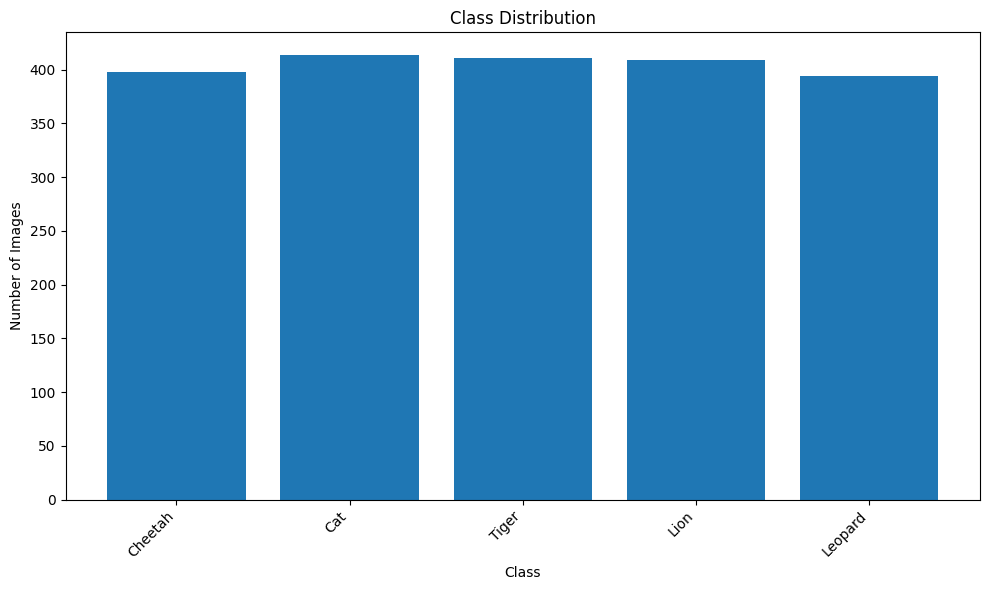

Number of images per class:
Cheetah: 398
Cat: 414
Tiger: 411
Lion: 409
Leopard: 394


In [ ]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Dictionary to store the number of images per class
num_images_per_class = {}

# Iterate over each subfolder and count the number of images
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_path))
    num_images_per_class[class_name] = num_images

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(num_images_per_class.keys(), num_images_per_class.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the number of images in each class
print("Number of images per class:")
for class_name, num_images in num_images_per_class.items():
    print(f"{class_name}: {num_images}")


 Here we visualize a random sample of images from each class within a dataset directory using matplotlib and PIL (Python Imaging Library).



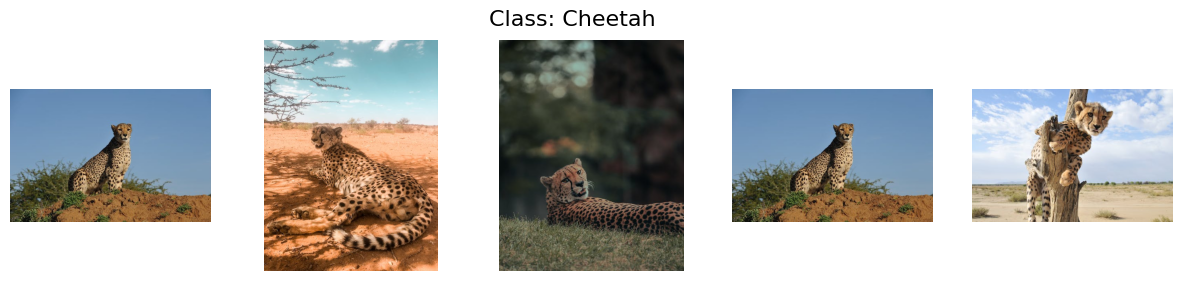

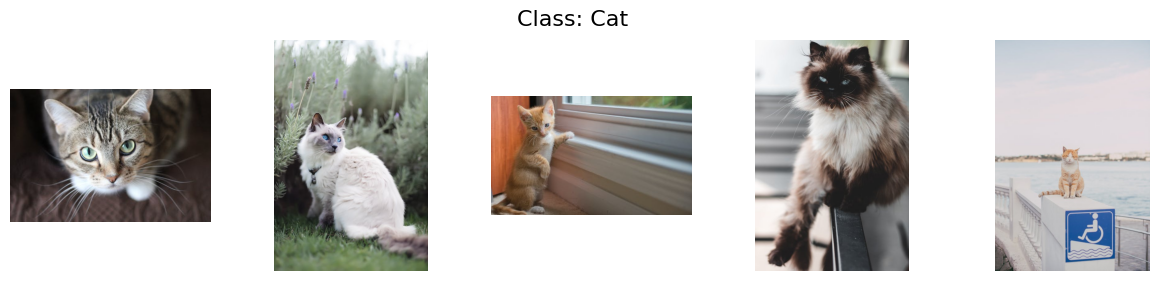

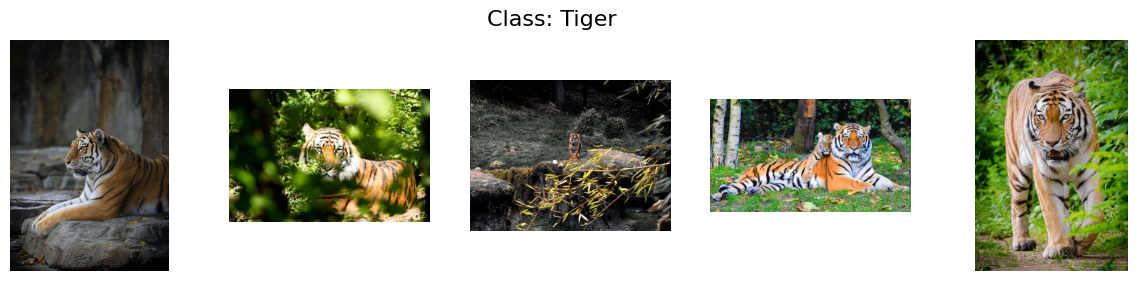

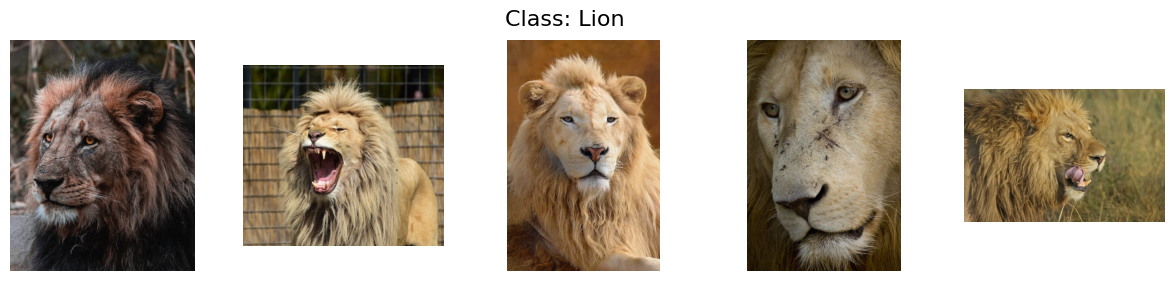

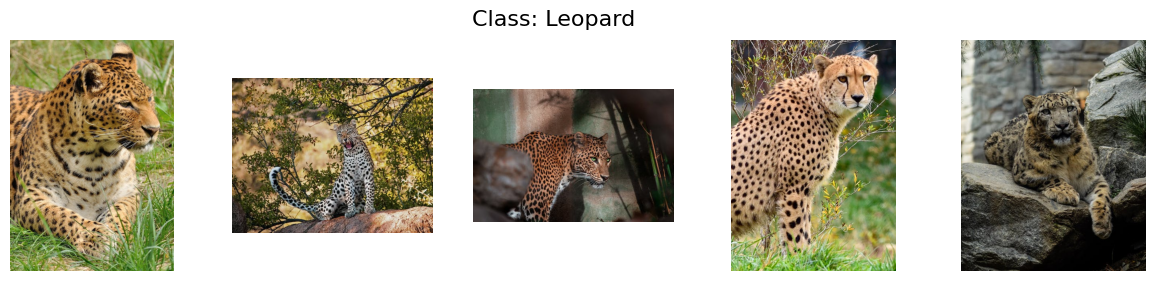

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your dataset directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Define the number of images to visualize per class
num_images_to_visualize = 5

# Iterate over each class and visualize a random sample of images
for class_name in classes:
    # Construct the directory path for the class
    class_dir = os.path.join(data_dir, class_name)

    # Get a list of image files in the class directory
    image_files = os.listdir(class_dir)

    # Randomly select a subset of images from the class
    sampled_images = random.sample(image_files, num_images_to_visualize)

    # Plot the sampled images in a grid
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)
    for i, image_file in enumerate(sampled_images):
        # Load and display the image
        image_path = os.path.join(class_dir, image_file)
        image_data = Image.open(image_path)
        plt.subplot(1, num_images_to_visualize, i + 1)
        plt.imshow(image_data)
        plt.axis('off')
    plt.show()


In this code snippet we demonstrate how to access images and labels from a train_generator, which yields batches of image data and corresponding one-hot encoded labels during model training:

Shape of images batch: (32, 224, 224, 3)


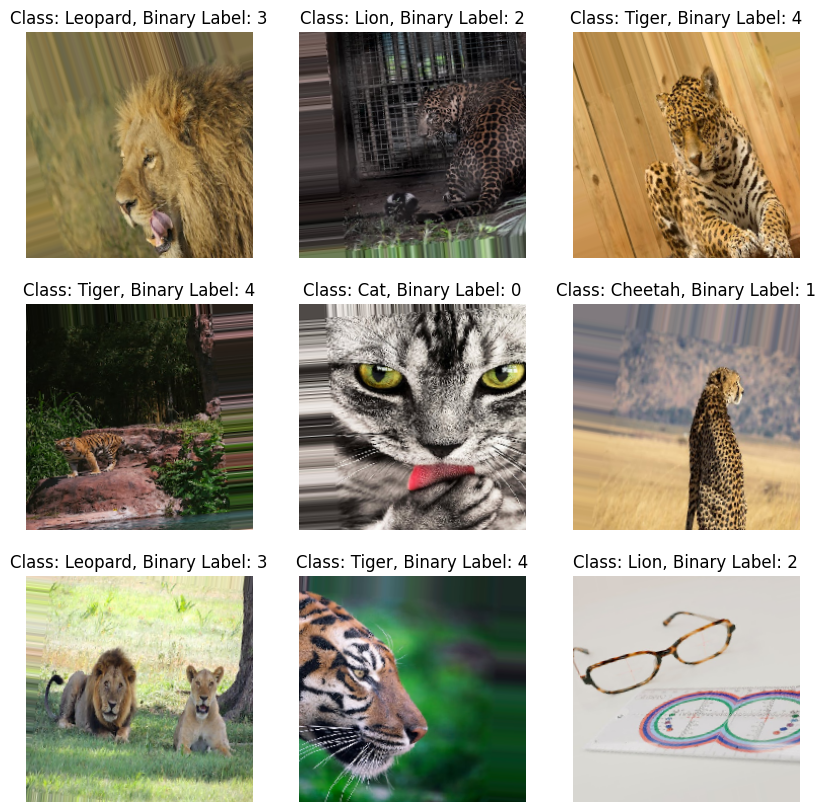

In [ ]:
# Access images and labels
for images, labels in train_generator:
    # 'images' is a batch of images with shape (batch_size, 64, 64, 3)
    # 'labels' is an array of corresponding one-hot encoded labels with shape (batch_size, num_classes)

    # Get the class names (subfolder names) from the class indices
    class_names = [classes[i] for i in np.argmax(labels, axis=1)]

    # Get the binary labels from the one-hot encoded labels
    binary_labels = [np.argmax(label) for label in labels]

    # Print the shape of the first batch of images
    print("Shape of images batch:", images.shape)

    # Visualize a sample of images along with their class names and binary labels
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Visualize the first 9 images in the batch
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        class_name = class_names[i]
        binary_label = binary_labels[i]
        plt.title(f"Class: {class_name}, Binary Label: {binary_label}")  # Display class name and binary label
        plt.axis("off")
    plt.show()

    # Example: Break the loop after processing one batch
    break


## Comprehensive Image Statistics Calculation in Dataset Directory
This code snippet calculates various statistics for images within a dataset directory, including mean pixel values, standard deviations, and pixel value ranges across RGB channels.

**Computing Statistics per Image**: For each image, computes the mean (np.mean) and standard deviation (np.std) for each RGB channel (axis=(0, 1)) and computes the pixel value range using np.min and np.max.

**Computing Overall Statistics**: Calculates the overall mean pixel values (overall_mean), standard deviations (overall_std), and pixel value range (overall_pixel_value_range) across all images and RGB channels by taking the mean across the arrays.[link text](https://)








In [ ]:
import os
import numpy as np

# Define the path to your dataset directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Initialize lists to store image statistics
channel_means = []
channel_stds = []
pixel_value_ranges = []

# Iterate over each class and compute image statistics
for class_name in classes:
    # Construct the directory path for the class
    class_dir = os.path.join(data_dir, class_name)

    # Iterate over the images in the class directory
    for image_file in os.listdir(class_dir):
        # Load the image and convert it to a NumPy array
        image_path = os.path.join(class_dir, image_file)
        image_data = np.array(Image.open(image_path))

        # Compute mean and standard deviation for each channel (RGB)
        channel_means.append(np.mean(image_data, axis=(0, 1)))
        channel_stds.append(np.std(image_data, axis=(0, 1)))

        # Compute range of pixel values for each channel
        pixel_value_ranges.append((np.min(image_data, axis=(0, 1)), np.max(image_data, axis=(0, 1))))

# Convert lists to NumPy arrays for easier computation
channel_means = np.array(channel_means)
channel_stds = np.array(channel_stds)
pixel_value_ranges = np.array(pixel_value_ranges)

# Compute overall mean and standard deviation across all images and channels
overall_mean = np.mean(channel_means, axis=0)
overall_std = np.mean(channel_stds, axis=0)
overall_pixel_value_range = (np.min(pixel_value_ranges[:, 0]), np.max(pixel_value_ranges[:, 1]))

# Print the computed statistics
print("Overall Image Statistics:")
print(f"Mean pixel values (RGB): {overall_mean}")
print(f"Standard deviation of pixel values (RGB): {overall_std}")
print(f"Pixel value range (RGB): {overall_pixel_value_range}")


Overall Image Statistics:
Mean pixel values (RGB): [116.65840536 106.60323351  88.53491876]
Standard deviation of pixel values (RGB): [54.46393272 50.61660727 48.88544952]
Pixel value range (RGB): (0, 255)


In [ ]:
'''Mean Pixel Values (RGB):
Mean pixel values represent the average intensity of each color channel (Red, Green, Blue) across all images in your dataset.
In your result, the mean pixel values are approximately:
Red channel: 116.66
Green channel: 106.60
Blue channel: 88.53
These values indicate that, on average, the intensity of red pixels is highest, followed by green pixels, and then blue pixels.
Standard Deviation of Pixel Values (RGB):
Standard deviation measures the spread or variability of pixel intensities around the mean value for each color channel.
In your result, the standard deviation of pixel values is approximately:
Red channel: 54.46
Green channel: 50.62
Blue channel: 48.89
These values indicate the variability or diversity of pixel intensities within each channel. Higher standard deviations suggest greater variability in pixel values.
Pixel Value Range (RGB):
Pixel value range specifies the minimum and maximum pixel values observed across all images and channels in your dataset.
In your result, the pixel value range for each channel is from 0 to 255.
This indicates that the pixel intensities range from the minimum value of 0 (black) to the maximum value of 255 (white) for each color channel, covering the full spectrum of possible pixel values.
'''

# Exploring Image Dimension Distribution in Dataset Directories
Here we analyze the distribution of image dimensions (widths and heights) within a dataset directory by plotting histograms of image widths and heights using matplotlib and PIL (Python Imaging Library).

**Iterating Over Images and Recording Dimensions:** Iterates over each class (class_name) in data_dir, then iterates over images (image_file) within each class directory (class_dir). For each image, it opens the image using PIL (Image.open(image_path)) to obtain its dimensions (width and height), which are then appended to the respective lists (image_widths, image_heights).



**Plotting Histograms:** Uses matplotlib (plt.hist) to plot histograms of image widths (image_widths) and heights (image_heights) side by side.




The first subplot (plt.subplot(1, 2, 1)) shows the distribution of image widths (image_widths) with a blue color.
The second subplot (plt.subplot(1, 2, 2)) shows the distribution of image heights (image_heights) with a green color.
Configuring Plot Titles and Labels: Sets titles, x-axis labels (xlabel), and y-axis labels (ylabel) for each subplot to describe the plotted data.


Displaying the Plots: Displays the histograms using plt.show() to visualize the distribution of image dimensions within the dataset.

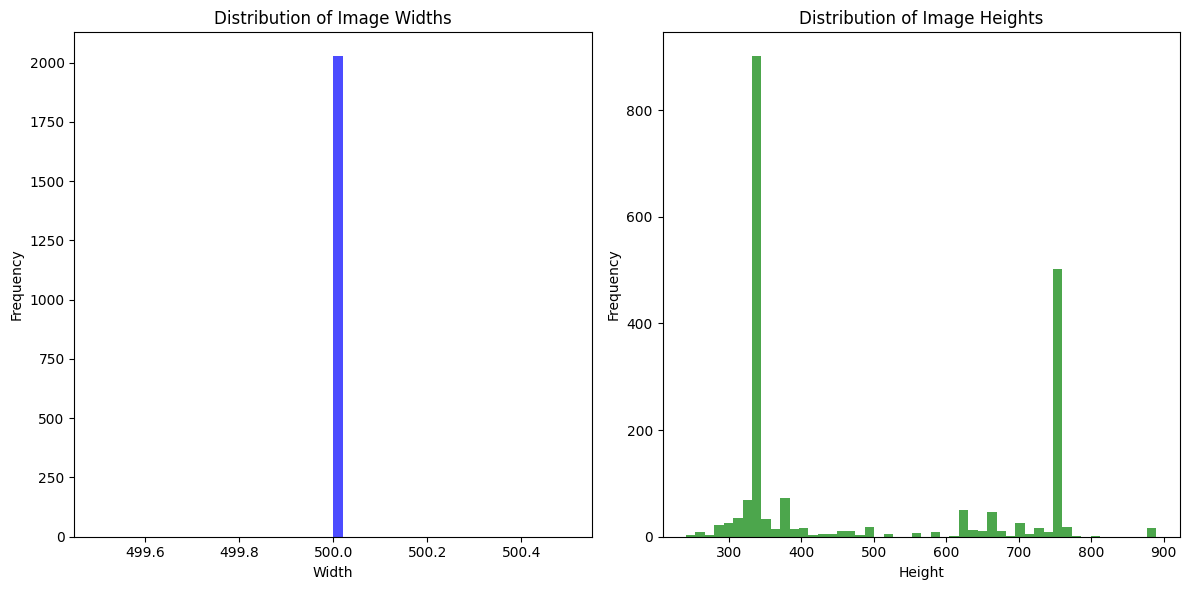

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your dataset directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Initialize lists to store image dimensions
image_widths = []
image_heights = []

# Iterate over the images in the dataset and record their dimensions
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        with Image.open(image_path) as img:
            width, height = img.size
            image_widths.append(width)
            image_heights.append(height)

# Plot histograms of image widths and heights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Analyzing Class Distribution in Dataset Directories
In this code snippet we analyzed the class distribution within a dataset directory by counting the number of samples (images) per class, computing the total number of samples, and calculating the percentage of samples in each class.

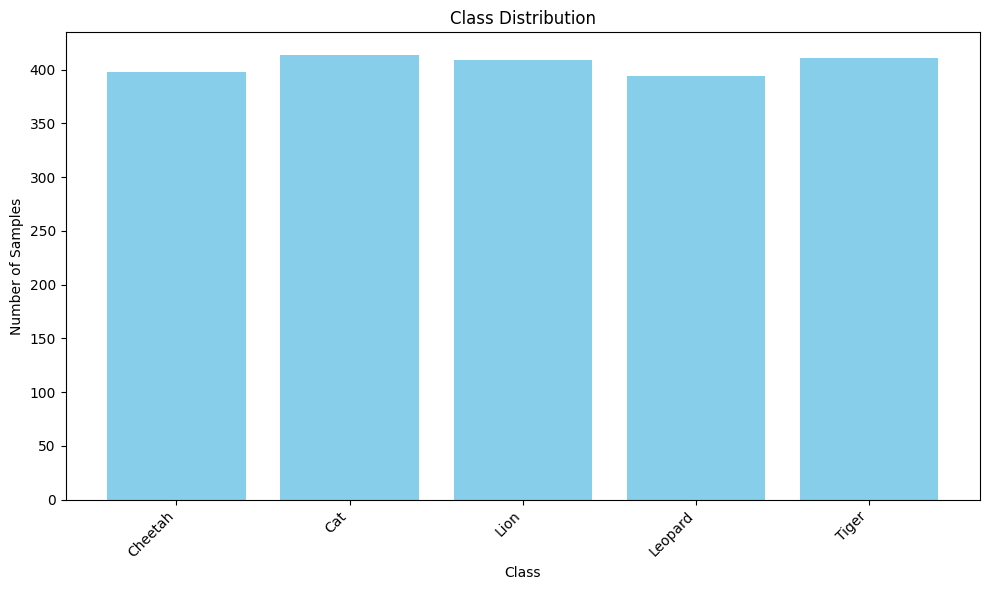

Class Distribution Statistics:
Cheetah: 398 samples (19.64% of total)
Cat: 414 samples (20.43% of total)
Lion: 409 samples (20.19% of total)
Leopard: 394 samples (19.45% of total)
Tiger: 411 samples (20.29% of total)


In [ ]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Initialize a dictionary to store the number of samples per class
class_counts = {}

# Count the number of samples in each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_samples = len(os.listdir(class_dir))
    class_counts[class_name] = num_samples

# Compute the total number of samples in the dataset
total_samples = sum(class_counts.values())

# Compute the percentage of samples in each class
class_percentages = {class_name: count / total_samples * 100 for class_name, count in class_counts.items()}

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the class distribution statistics
print("Class Distribution Statistics:")
for class_name, count in class_counts.items():
    percentage = class_percentages[class_name]
    print(f"{class_name}: {count} samples ({percentage:.2f}% of total)")


# Train/Test dataset

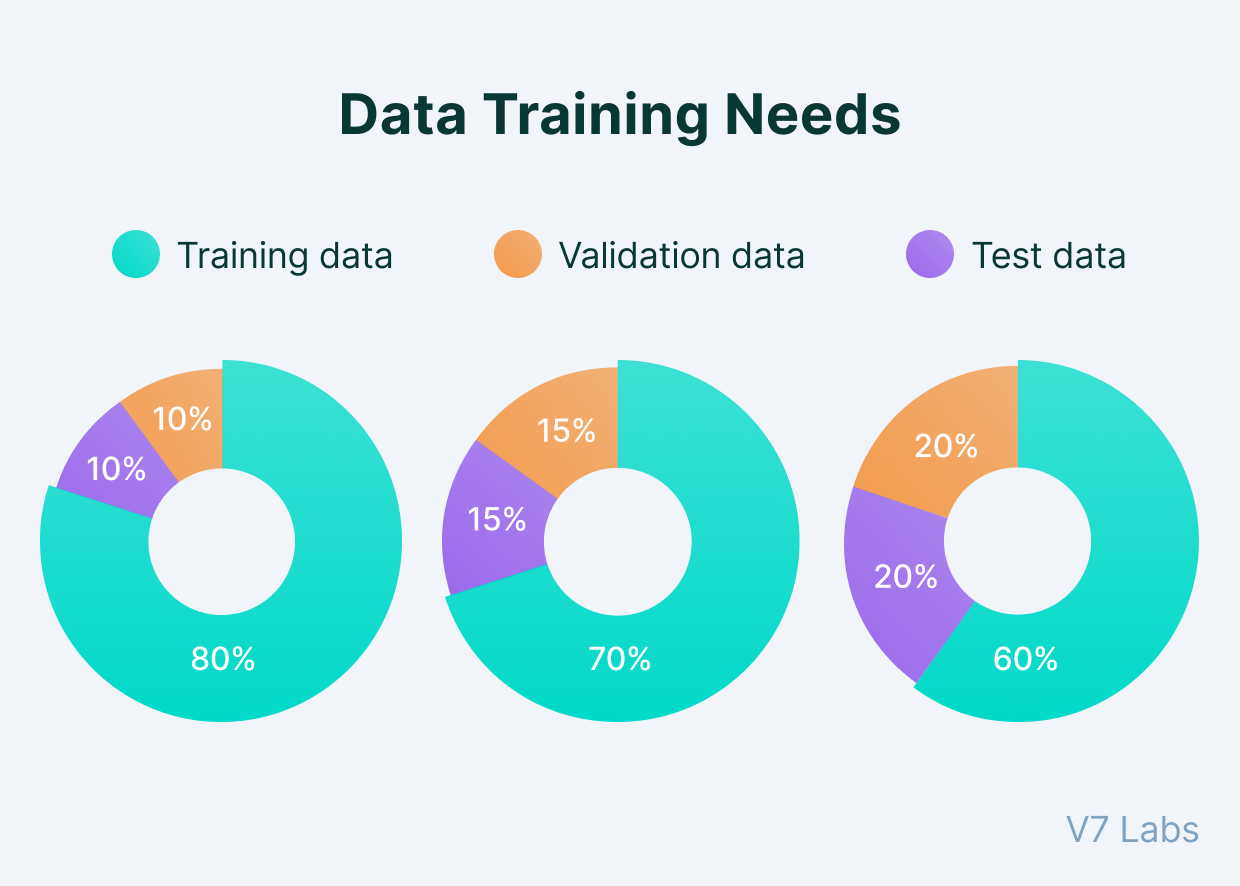

This coming code block sets up data generators for training and validation using ImageDataGenerator from Keras for image preprocessing and data augmentation. It splits the dataset into training and validation subsets using a specified validation split.

Here's a breakdown of what each part of the code accomplishes:

Importing Libraries: Imports TensorFlow (tensorflow) and ImageDataGenerator from tensorflow.keras.preprocessing.image.

Defining Constants: Specifies constants for the number of classes (NUM_CLASSES), target image size (IMG_SIZE), and batch size (BATCH_SIZE) for data processing and model training.

Defining Directories: Defines the train_dir directory path, which contains subfolders representing different classes of images for training.

Data Augmentation and Preprocessing: Configures an ImageDataGenerator instance (train_datagen) for data augmentation and preprocessing:

**rescale**=1./255: Rescales pixel values to [0, 1].             
**rotation_range**=20: Randomly rotates images by up to 20 degrees.       
**width_shift_range**=0.2 and height_shift_range=0.2: Randomly shifts the width and height of images by up to 20%.                  
**horizontal_flip**=True: Randomly flips images horizontally.                
**validation_split**=0.2: Specifies the validation split (20% of the data) for splitting the dataset into training and validation subsets.              

**Training Generator:** Creates a training generator (train_generator) using train_datagen.flow_from_directory:

Specifies the train_dir directory as the source of training data.
Sets the target image size (target_size), batch size (batch_size), and class mode (class_mode) as 'categorical' for multi-class classification.
Specifies subset='training' to indicate that this generator is for the training subset.
Validation Generator: Creates a validation generator (validation_generator) using train_datagen.flow_from_directory:

Configured similarly to train_generator but specifies subset='validation' to indicate that this generator is for the validation subset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

NUM_CLASSES = 5
IMG_SIZE = 64
BATCH_SIZE = 32

# Define directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Specify validation split
)

# Training Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify subset as training
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation
)


Found 1624 images belonging to 5 classes.
Found 402 images belonging to 5 classes.


# Assessing Image Quality in Dataset Directories
Here we defined a function check_image_quality to assess the quality of images based on their grayscale standard deviation. It iterates through a batch of images from a train_generator, calculates the standard deviation of each image, and counts images with low quality (standard deviation below a specified threshold).

Here's a breakdown of what each part of the code accomplishes:

**Importing Libraries**: Imports OpenCV (cv2) for image processing and NumPy (numpy) for numerical computations.

**Defining check_image_quality Function:**

Converts the input RGB image to grayscale using cv2.cvtColor.
Computes the standard deviation (std_dev) of pixel intensities in the grayscale image.
Compares the standard deviation with a predefined threshold (threshold) to determine if the image quality is acceptable (True) or poor (False).
Initializing Counter for Low Quality Images: Initializes low_quality_count to zero to keep track of the number of images with low quality.

**Iterating Through Images:** Iterates through batches of images (images) and labels (labels) from the train_generator.

For each image in the batch, calls check_image_quality to assess its quality.
If the image quality is deemed low (based on the returned value from check_image_quality), increments low_quality_count by one.
Taking Appropriate Action: Optionally, you can take specific actions (e.g., removing the image, updating its label) based on the image quality assessment.

In the example, a comment outlines a possible action (os.remove(image_path)) for removing low-quality images (replace image_path with the actual image file path).
**Breaking Out of the Loop**: Stops the iteration after processing the first batch of images (break statement) for demonstration purposes.

**Printing Results:** Outputs the total number of images identified as low quality (low_quality_count).

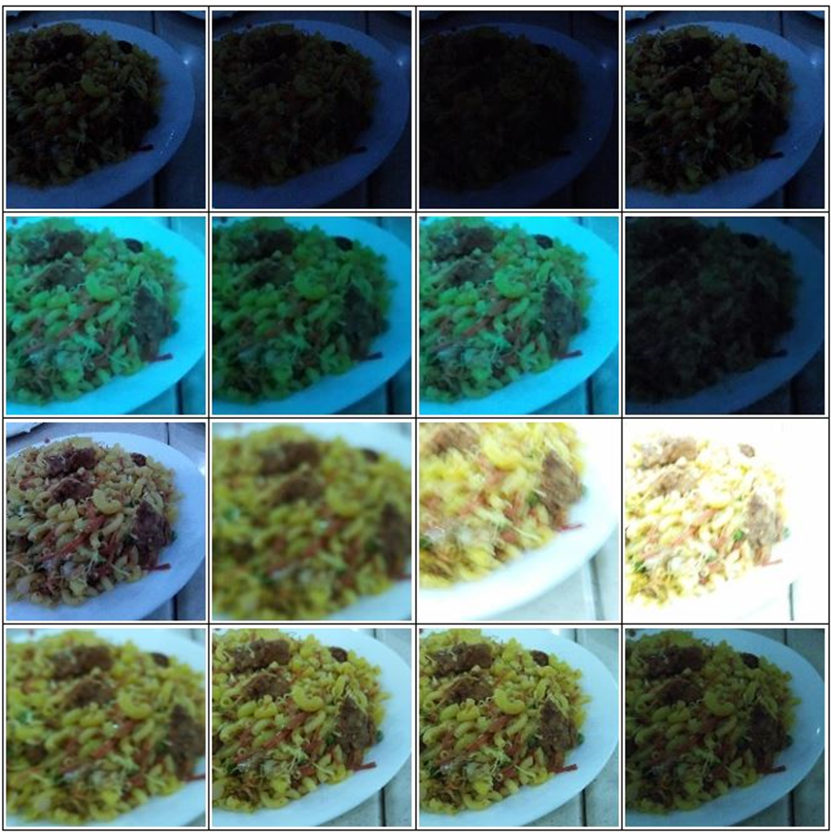

In [ ]:
import cv2
import numpy as np

# Define a function to check image quality
def check_image_quality(image):
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Compute the standard deviation of pixel intensities
    std_dev = np.std(grayscale_image)

    # Define a threshold for acceptable standard deviation
    threshold = 10  # Adjust as needed

    # Check if the standard deviation is below the threshold
    if std_dev < threshold:
        return False  # Image quality is poor
    else:
        return True  # Image quality is acceptable

# Initialize count for low quality images
low_quality_count = 0

# Iterate through images and check quality
for images, labels in train_generator:
    for image in images:
        if not check_image_quality(image):
            low_quality_count += 1
            # Take appropriate action, such as removing the image or updating its label
            # Example: os.remove(image_path)
            # Note: Replace 'image_path' with the path to the image file
    break  # Only check the first batch

print("Number of images with low quality:", low_quality_count)


Number of images with low quality: 32


#Assessing Image Quality in Dataset Directories
This code snippet iterates through subfolders (each representing a class) within a dataset directory and checks the file extensions of images within each class. It determines whether all images in a class have the same file extension or if there are multiple file extensions present.

Here's a breakdown of what each part of the code accomplishes:

Setting Data Directory and Classes: Defines data_dir as the path to the dataset directory containing subfolders (each representing a class) and retrieves a list of subfolders (classes).

Iterating Over Each Class: Iterates through each class (class_name) in classes and constructs the full path to the class directory (class_path).

Checking File Extensions:

Retrieves the list of files (files) within the class directory (class_path) using o**s.listdir**.
Extracts file extensions from each file using os.path.splitext(file)[1] and creates a set of unique extensions (extensions) using a set comprehension.
Analyzing Extensions:

If the set of **extensions** (extensions) contains only one unique extension (len(extensions) == 1), it indicates that all images within the class have the same file format.
Prints a message indicating that all images in the class have the same extension ({extensions.pop()}).
If the set of extensions contains multiple unique extensions, it indicates that images within the class have varying file formats.
Prints a message indicating the presence of multiple extensions ({extensions}).

In [ ]:
import os

# Path to the directory containing subfolders (each representing a class)
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Get list of subfolders (classes)
classes = os.listdir(data_dir)

# Iterate over each subfolder and check file extensions
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)

    # Get list of files in the subfolder
    files = os.listdir(class_path)

    # Extract file extensions
    extensions = {os.path.splitext(file)[1] for file in files}

    # If there's only one unique extension, all images have the same format
    if len(extensions) == 1:
        print(f"All images in '{class_name}' have the same extension: {extensions.pop()}")
    else:
        print(f"Images in '{class_name}' have multiple extensions: {extensions}")


All images in 'Cheetah' have the same extension: .jpg
All images in 'Cat' have the same extension: .jpg
All images in 'Lion' have the same extension: .jpg
All images in 'Leopard' have the same extension: .jpg
All images in 'Tiger' have the same extension: .jpg


This code snippet demonstrates how to use ImageDataGenerator from Keras for image augmentation and visualizes the augmented images for each class within a dataset directory.


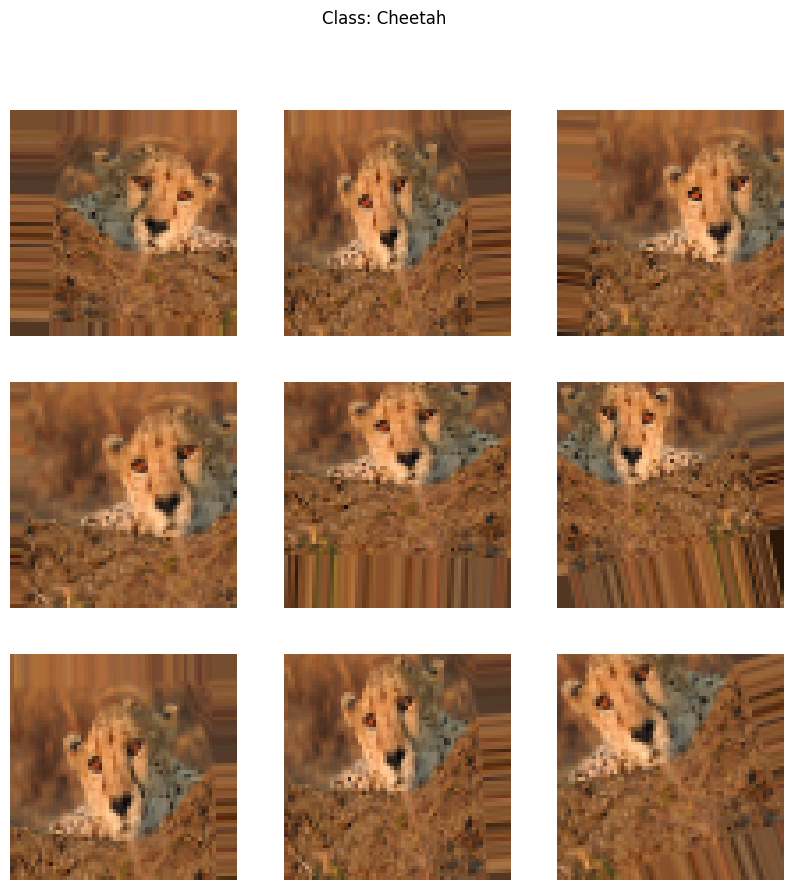

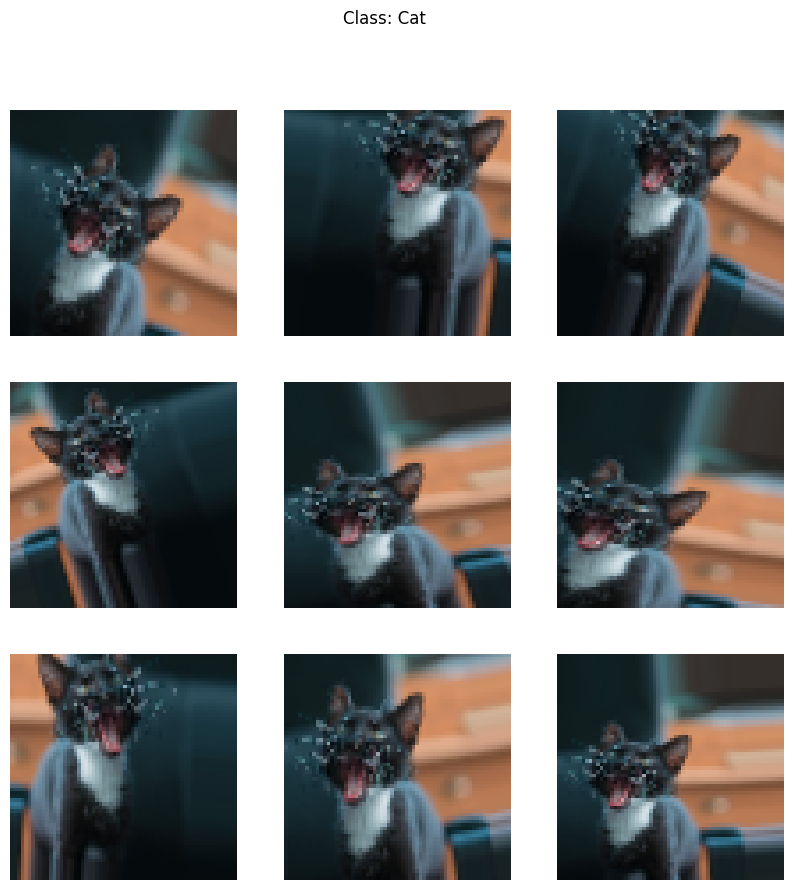

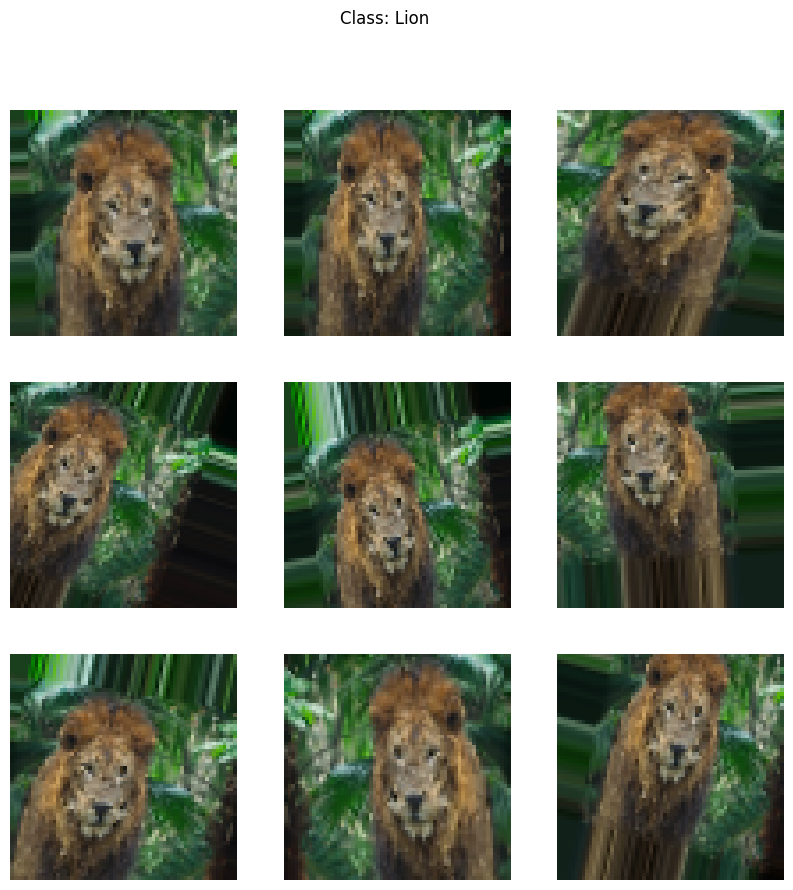

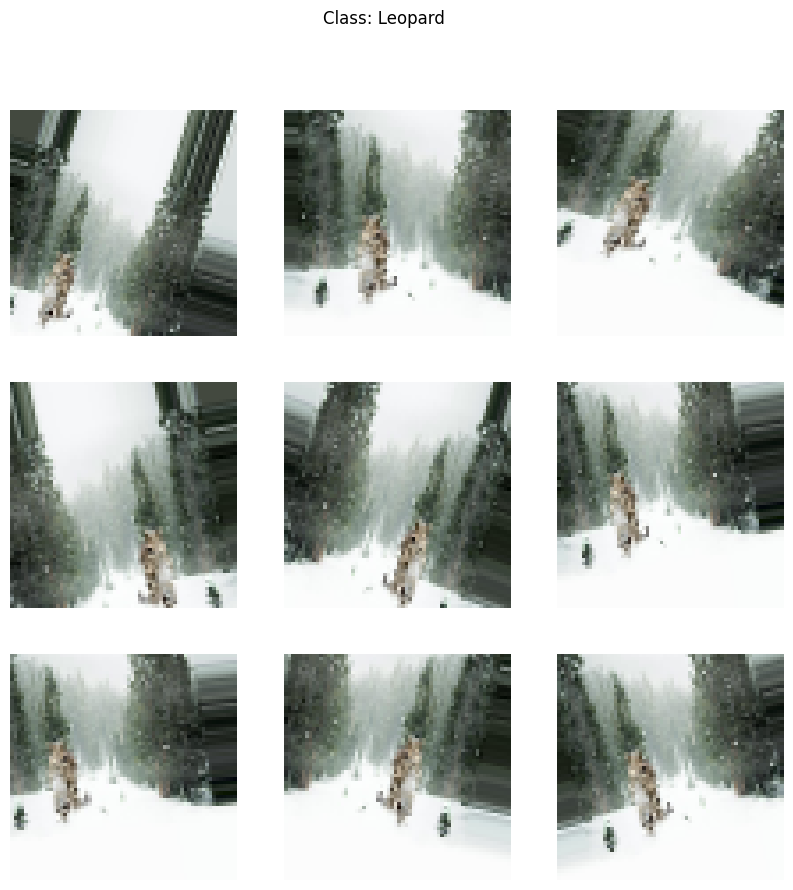

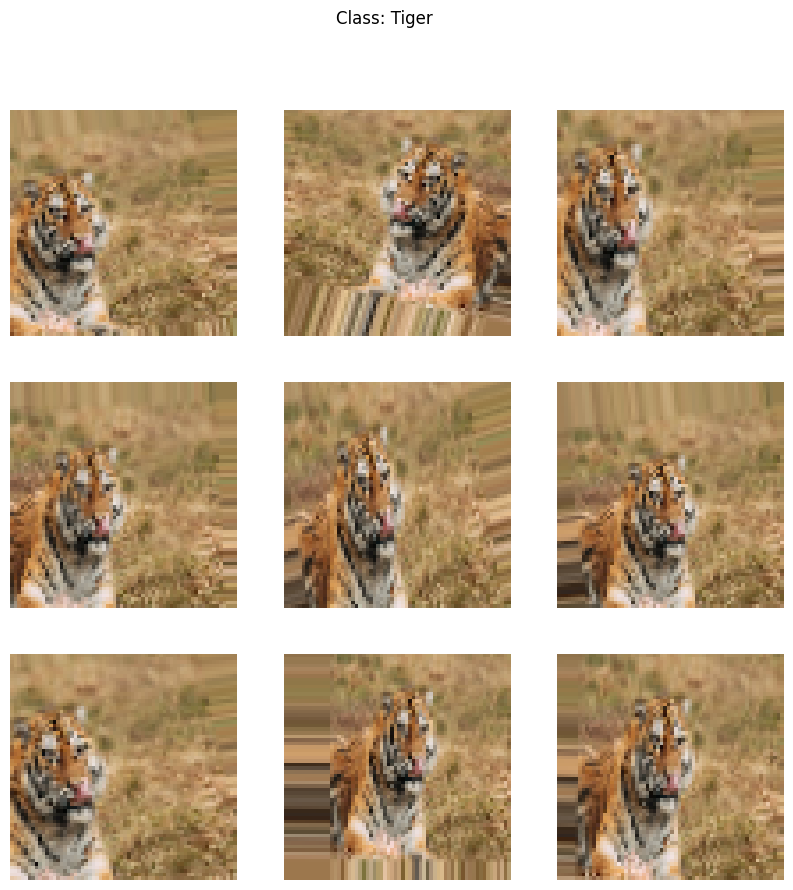

In [ ]:
from tensorflow.keras.preprocessing import image

# Define data generator for augmentation
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear images by up to 20 degrees
    zoom_range=0.2,  # Zoom images by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest available value
)

# Define the directory containing subfolders (each representing a class)
data_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'
# Get list of subfolders (classes)
classes = [class_name for class_name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, class_name))]

# Iterate over each class and visualize augmented images
for class_name in classes:
    # Construct the directory path for the class
    class_dir = os.path.join(data_dir, class_name)

    # Load a sample image from the class directory
    sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    sample_image = image.load_img(sample_image_path, target_size=(64, 64))
    sample_image = image.img_to_array(sample_image)
    sample_image = sample_image.reshape((1,) + sample_image.shape)  # Add batch dimension

    # Visualize augmented images
    plt.figure(figsize=(10, 10))
    i = 0
    for batch in datagen_aug.flow(sample_image, batch_size=1):
        augmented_image = batch[0]
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_image)
        plt.axis('off')
        i += 1
        if i % 9 == 0:
            break  # Visualize 9 augmented images
    plt.suptitle(f"Class: {class_name}")
    plt.show()


# **Constructing Transfer Learning Model with VGG16 for Multi-class Image Classification**
Here we demonstrated the construction of a transfer learning model using a pre-trained VGG16 convolutional base for a multi-class image classification task. Here's a breakdown of the steps involved:

Importing Libraries: Importing necessary libraries including TensorFlow (tensorflow) and modules from tensorflow.keras for image preprocessing (ImageDataGenerator), pre-trained models (VGG16), layers (Flatten, Dense, Dropout), and model construction (Model).

Setting Constants:

NUM_CLASSES: Number of classes in the classification task (5 in this case).
IMG_SIZE: Input image size expected by VGG16 (224x224).
BATCH_SIZE: Batch size for training.
epochs: Number of epochs for training the model.
Defining Directories:

train_dir: Path to the training data directory containing subfolders representing different classes.
Loading Pre-trained VGG16 Model:

base_model: Loads the pre-trained VGG16 model with weights trained on ImageNet data.
include_top=False: Excludes the fully connected layers (top) of the VGG16 model.
input_shape=(IMG_SIZE, IMG_SIZE, 3): Specifies the input image shape expected by VGG16 (224x224 RGB images).
Freezing the Convolutional Base:

base_model.trainable = False: Freezes the weights of the convolutional base to prevent them from being updated during training.
Adding Custom Classifier:

Defines a custom classifier (x) on top of the frozen convolutional base.
Flatten(): Flattens the output of the base model.
Dense(512, activation='relu'): Adds a fully connected layer with 512 units and ReLU activation.
Dropout(0.5): Applies dropout regularization to reduce overfitting.
Dense(NUM_CLASSES, activation='softmax'): Adds the final output layer with softmax activation for multi-class classification.
Creating the Final Model:

model: Constructs the final model by specifying the input (base_model.input) and output (predictions) layers.
Compiling the Model:

Compiles the model using Adam optimizer ('adam'), categorical cross-entropy loss ('categorical_crossentropy') for multi-class classification, and accuracy metric ('accuracy') for evaluation during training.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

NUM_CLASSES = 5
IMG_SIZE = 224  # VGG16 expects input images of size 224x224
BATCH_SIZE = 32
epochs = 30

# Define directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


# Training the model

This code snippet trains a deep learning model (model) using the training data generated by train_generator and validates it using the validation data from validation_generator. Here's a brief explanation of each step:

Training the Model:

model.fit(...): Trains the model using the training data (train_generator) for a specified number of epochs (epochs) while also using the validation data (validation_generator) for validation during training.
The fit method iterates over the training data for the specified number of epochs, updating the model's weights based on the loss and optimizer defined during compilation (model.compile(...)).
Evaluation:

test_loss, test_accuracy = model.evaluate(validation_generator): Evaluates the trained model on the validation data (validation_generator) to compute the loss and accuracy.
The evaluate method computes the loss and accuracy metrics of the model based on the validation data, providing insights into the model's performance on unseen data.
Output:

print("Test Loss:", test_loss): Displays the computed test loss (typically using categorical cross-entropy for classification tasks).
print("Test Accuracy:", test_accuracy): Displays the computed test accuracy, indicating the model's performance on the validation set.

In [ ]:
#training the model
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

NameError: name 'model' is not defined

This function plotLosses(history) creates a figure with two subplots to display the training and validation loss curves (ax1) and the training and validation accuracy curves (ax2) based on the provided history object from model training. Each subplot is labeled with appropriate titles and axes labels, and legends are added to differentiate between training and validation metrics. The function then adjusts the subplot layout to ensure proper spacing and displays the finalized plot using plt.show(). This visualization aids in assessing the performance and behavior of the model during training, facilitating insights into training progress, overfitting, or underfitting.

In [ ]:
import matplotlib.pyplot as plt

def plotLosses(history):
  # Create a figure and a grid of subplots with a single call
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  # Plot the loss curves on the first subplot
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_title('Loss curves')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  # Plot the accuracy curves on the second subplot
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_title('Accuracy curves')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  # Adjust the spacing between subplots
  fig.tight_layout()
  # Show the figure
  plt.show()


plotLosses(history)

In [ ]:
model.save('path_to_save_model.h5')

# Model Inference and Prediction for New Images with CSV Output






This script uses a trained model to predict classes for new images stored in new_images_dir. It iterates through the images, preprocesses each one, and makes predictions using the model. The predicted class labels and corresponding image IDs are stored in lists (predictions and image_ids).

**Finally**, the predictions are saved to a CSV file named predictions.csv, containing image IDs and their predicted class labels. This workflow showcases image preprocessing, model inference, and data output using CSV file handling in Python.

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Load the trained model
model = model  # Assuming 'model' contains your trained model

# Path to the directory containing the new images
new_images_dir = '/content/drive/My Drive/Colab Notebooks/ML project/dl-challenge-thomasmore-2023-2024/test/test'

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0,1]
    return img_array

# List to store predictions
predictions = []

# List to store image IDs
image_ids = []

# Iterate through the images in the directory
for filename in os.listdir(new_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Preprocess the image
        img_path = os.path.join(new_images_dir, filename)
        img_array = preprocess_image(img_path)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Store prediction and image ID
        predictions.append(predicted_class)
        image_ids.append(filename.split('.')[0])  # Extracting image ID from filename

# Write predictions to a CSV file
output_csv_file = 'predictions.csv'
with open(output_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'predicted_class'])
    for i in range(len(predictions)):
        writer.writerow([image_ids[i], predictions[i]])

print("Predictions saved to", output_csv_file)


# VGG16 model

Data Preparation:

Images are augmented and preprocessed using ImageDataGenerator for training (train_generator) and validation (validation_generator).
Model Building:

Loads the VGG16 model without the top layers (include_top=False) and freezes the convolutional base.
Adds custom dense layers on top of the VGG16 base to adapt it for the specific classification task.
Model Compilation:

Compiles the model using adam optimizer, categorical_crossentropy loss, and accuracy metric.
Callbacks:

Defines EarlyStopping and ReduceLROnPlateau callbacks to prevent overfitting and adjust learning rate based on validation loss.
Model Training:

Trains the model (model.fit) with specified number of epochs, using training and validation generators, and incorporating callbacks.
Model Evaluation:

Evaluates the trained model on the validation set (validation_generator) to assess performance using test loss and accuracy.

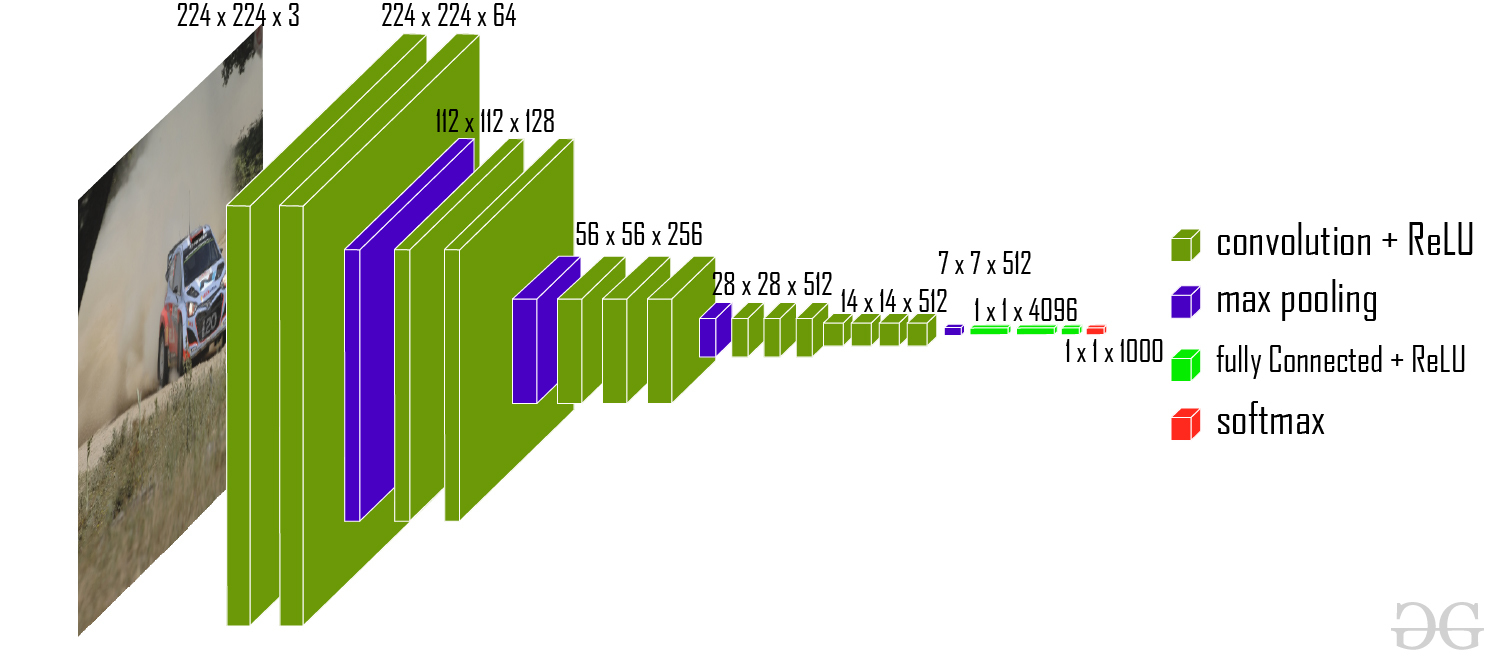

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

NUM_CLASSES = 5
IMG_SIZE = 224  # VGG16 expects input images of size 224x224
BATCH_SIZE = 64  # Increased batch size
epochs = 50  # Increased number of epochs

# Define directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Specify validation split
)

# Training and Validation Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify subset as training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)  # Increased number of units
x = Dropout(0.5)(x)  # Reduced dropout rate
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)  # Reduced regularization strength
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 1624 images belonging to 5 classes.
Found 402 images belonging to 5 classes.
Epoch 1/50
26/26 [==============================] - 52s 2s/step - loss: 5.5177 - accuracy: 0.3171 - val_loss: 1.6447 - val_accuracy: 0.5473 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 42s 2s/step - loss: 1.5409 - accuracy: 0.5807 - val_loss: 1.2008 - val_accuracy: 0.7313 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 41s 2s/step - loss: 1.2476 - accuracy: 0.6749 - val_loss: 0.9999 - val_accuracy: 0.7562 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 40s 2s/step - loss: 1.1434 - accuracy: 0.6897 - val_loss: 1.0394 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 40s 2s/step - loss: 1.0736 - accuracy: 0.7155 - val_loss: 0.9211 - val_accuracy: 0.7910 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 40s 2s/step - loss: 1.0075 - accuracy: 0.7340 - val_loss: 0.8199 - val_accuracy: 0.8234 - lr: 0.0010

# Model Evaluation and Visualization with Classification Report and Confusion Matrix

Model Prediction:
**bold text**
Uses the trained model to predict classes for the validation set (validation_generator).

**Calculating Predicted and True Classes:**

Extracts the predicted classes (predicted_classes) by taking the argmax of the predicted probabilities.
Retrieves the true classes (true_classes) from the validation generator.

**Classification Report**:

Generates a classification report using sklearn.metrics.classification_report to display precision, recall, F1-score, and support for each class.

**Confusion Matrix:**

Computes the confusion matrix using sklearn.metrics.confusion_matrix to visualize the performance of the model across different classes.

**Visualization:**

Plots the confusion matrix as a heatmap using matplotlib.pyplot and seaborn for enhanced visualization.

7/7 [==============================] - 10s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        82
           1       0.15      0.15      0.15        79
           2       0.20      0.19      0.19        78
           3       0.17      0.17      0.17        81
           4       0.16      0.16      0.16        82

    accuracy                           0.18       402
   macro avg       0.18      0.18      0.18       402
weighted avg       0.18      0.18      0.18       402



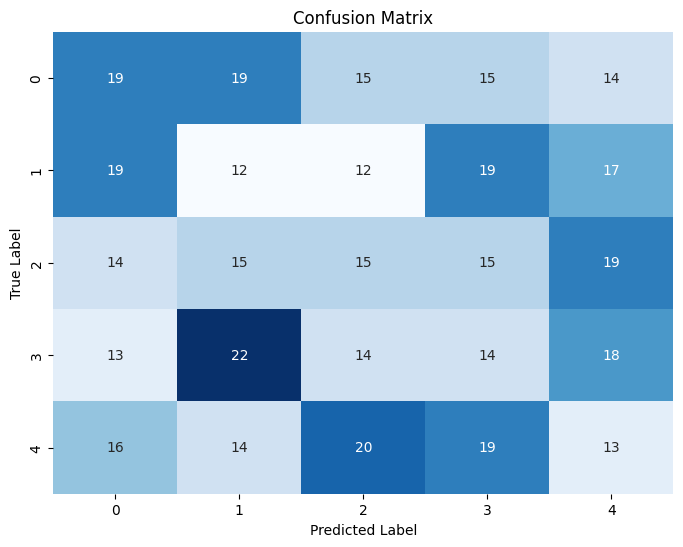

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test set
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Calculate classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Visualizing Training and Validation Loss/Accuracy Curves

**Inputs**:

**history**: This is typically the history object returned by the model.fit() method when training a neural network model in TensorFlow or Keras.
Functionality:

Creates a figure with two subplots (ax1 and ax2) to display the loss curves and accuracy curves.
Plots the training loss ('loss') and validation loss ('val_loss') on the first subplot (ax1).
Plots the training accuracy ('accuracy') and validation accuracy ('val_accuracy') on the second subplot (ax2).
Adds titles, axis labels, and legends to the subplots for clarity.
Adjusts the layout and spacing of the subplots to ensure they are properly displayed without overlap.
Displays the figure using plt.show().

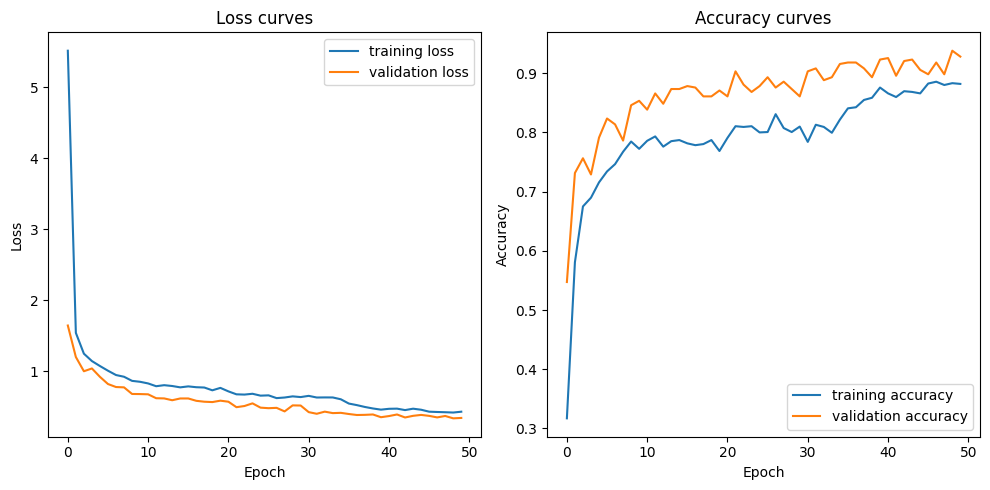

In [ ]:
import matplotlib.pyplot as plt

def plotLosses(history):
  # Create a figure and a grid of subplots with a single call
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  # Plot the loss curves on the first subplot
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_title('Loss curves')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  # Plot the accuracy curves on the second subplot
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_title('Accuracy curves')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  # Adjust the spacing between subplots
  fig.tight_layout()
  # Show the figure
  plt.show()


plotLosses(history)

In [ ]:
# Define the path to save the model
save_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/my_model.h5'

# Save the model
model.save(save_path)

print("Model saved to:", save_path)


NameError: name 'model' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Generating Predictions for New Images Using
This script performs the following tasks:

Loading the Trained Model:

Assumes that a trained model (model) is already loaded.
Preprocessing New Images:

Defines a function preprocess_image(img_path) to load and preprocess images before making predictions.
Loads images from a specified directory (new_images_dir).
Converts each image to an array, resizes it to the target size (IMG_SIZE), and normalizes pixel values to the range [0, 1].
Making Predictions:

Iterates through each image file in the new_images_dir directory (supports JPG and PNG formats).
Uses the preprocess_image() function to prepare each image for prediction.
Applies the loaded model (model.predict()) to obtain predictions for each image.
Stores the predicted class (as the index of the maximum probability) and extracts the image ID from the filename.
Writing Predictions to CSV:

Creates a CSV file (output_csv_file) to store predictions.
Writes the image IDs and predicted classes into the CSV file.
Output:

Prints the path to the saved CSV file (output_csv_file) where the predictions are stored.

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Load the trained model
model = model  # Assuming 'model' contains your trained model

# Path to the directory containing the new images
new_images_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/test/test'

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0,1]
    return img_array

# List to store predictions
predictions = []

# List to store image IDs
image_ids = []

# Iterate through the images in the directory
for filename in os.listdir(new_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Preprocess the image
        img_path = os.path.join(new_images_dir, filename)
        img_array = preprocess_image(img_path)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Store prediction and image ID
        predictions.append(predicted_class)
        image_ids.append(filename.split('.')[0])  # Extracting image ID from filename

# Write predictions to a CSV file
output_csv_file = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsSecond.csv'
with open(output_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'predicted_class'])
    for i in range(len(predictions)):
        writer.writerow([image_ids[i], predictions[i]])

print("Predictions saved to", output_csv_file)


1/1 [==============================] - 0s 18ms/step
Predictions saved to /content/drive/My Drive/Colab Notebooks/ML project/dl-challenge-thomasmore-2023-2024/predictionsSecond.csv


# Training a Deep Learning Model with Transfer Learning using VGG16

Importing Required Libraries:

Imports necessary TensorFlow and Keras modules for building and training the model.

**Constants and Hyperparameters:**

Defines constants and hyperparameters such as NUM_CLASSES (number of target classes), IMG_SIZE (image size expected by VGG16), BATCH_SIZE (size of training batches), and epochs (number of training epochs).

**Data Loading and Augmentation:**

Sets up an ImageDataGenerator for data augmentation and preprocessing.
Specifies augmentation techniques like rotation, width and height shifting, shearing, zooming, and horizontal flipping.
Creates separate data generators (train_generator and validation_generator) for training and validation data using the specified augmentation settings.

**Loading Pre-Trained VGG16 Model:**

Loads the VGG16 model pre-trained on ImageNet without the top (fully connected) layers.
Freezes the convolutional base of the VGG16 model to prevent training.

**Custom Classifier Addition:**
Adds a custom classifier on top of the VGG16 base consisting of a Flatten layer followed by a Dense layer with 512 units and ReLU activation.
Introduces a Dropout layer with a dropout rate of 0.4 to reduce overfitting.
Defines the output layer with NUM_CLASSES units and softmax activation for multi-class classification.

**Model Compilation:**

Compiles the model using the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.

**Callback Definitions**:

Defines EarlyStopping and ReduceLROnPlateau callbacks to monitor validation loss and adjust learning rate dynamically during training.

**Model Training:**

Trains the model using model.fit() on the train_generator data.
Specifies the number of epochs and provides validation data (validation_generator) along with the defined callbacks.

**Model Evaluation:**

Evaluates the trained model on the validation set using model.evaluate().
Computes and prints the test loss and accuracy.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

NUM_CLASSES = 5
IMG_SIZE = 224  # VGG16 expects input images of size 224x224
BATCH_SIZE = 64  # Increased batch size
epochs = 50  # Increased number of epochs

# Define directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Data Augmentation and Preprocessing with additional augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Specify validation split
)

# Training and Validation Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify subset as training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classifier on top with reduced complexity (fewer units)
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)  # Reduced number of units
x = Dropout(0.4)(x)  # Slightly increased dropout rate
# L2 Regularization with a smaller weight decay
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Assign the layer itself

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 1624 images belonging to 5 classes.
Found 402 images belonging to 5 classes.
Epoch 1/50
26/26 [==============================] - 43s 2s/step - loss: 4.5140 - accuracy: 0.3319 - val_loss: 1.0773 - val_accuracy: 0.6219 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 39s 2s/step - loss: 1.0561 - accuracy: 0.5800 - val_loss: 0.7819 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 39s 2s/step - loss: 0.8229 - accuracy: 0.6890 - val_loss: 0.6483 - val_accuracy: 0.7786 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 39s 2s/step - loss: 0.7359 - accuracy: 0.7137 - val_loss: 0.5996 - val_accuracy: 0.7935 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 40s 2s/step - loss: 0.6952 - accuracy: 0.7432 - val_loss: 0.5508 - val_accuracy: 0.8060 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 39s 2s/step - loss: 0.6554 - accuracy: 0.7518 - val_loss: 0.4813 - val_accuracy: 0.8408 - lr: 0.0010

The plotLosses(history) function visualizes training and validation loss/accuracy curves over epochs using the history object returned by model.fit().

**Parameters:**

history: Training history containing metrics like loss and accuracy.
Steps:

Create a figure and two subplots (ax1, ax2) for loss and accuracy.
Plot training and validation loss on ax1, with labels and titles.
Plot training and validation accuracy on ax2, with labels and titles.
Adjust subplot layout and display the figure.
This function is essential for monitoring model performance during training, helping to identify trends like overfitting or convergence.

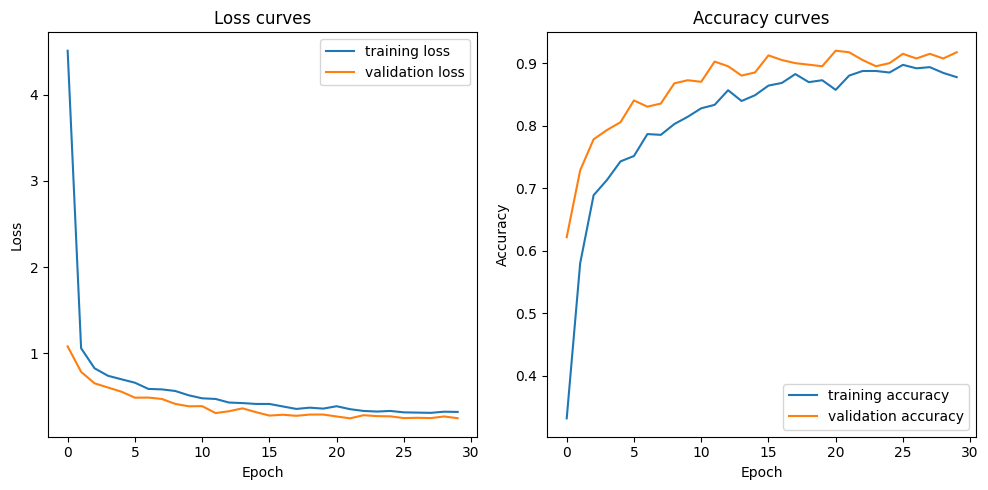

In [ ]:
import matplotlib.pyplot as plt

def plotLosses(history):
  # Create a figure and a grid of subplots with a single call
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  # Plot the loss curves on the first subplot
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_title('Loss curves')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  # Plot the accuracy curves on the second subplot
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_title('Accuracy curves')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  # Adjust the spacing between subplots
  fig.tight_layout()
  # Show the figure
  plt.show()


plotLosses(history)

In [ ]:
# Define the path to save the model
save_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/my_model2.h5'

# Save the model
model.save(save_path)

print("Model saved to:", save_path)


Model saved to: /content/drive/My Drive/Colab Notebooks/ML project/dl-challenge-thomasmore-2023-2024/my_model2.h5


This script loads a trained model from a specified path and uses it to make predictions on a set of new images stored in a directory. The predictions are saved to a CSV file along with the corresponding image IDs.

Steps:
Load Trained Model:

The path to the trained model (model_path) is specified.
The tf.keras.models.load_model() function is used to load the trained model.
Preprocess Image:

Define a preprocess_image() function that reads and preprocesses images from the specified directory (new_images_dir).
Images are resized to a target size (IMG_SIZE), converted to numpy arrays, and rescaled to values between 0 and 1.
Make Predictions:

Iterate through each image in the directory (new_images_dir).
Preprocess the image using preprocess_image() function.
Use the loaded model to make predictions (model.predict()).
Extract the predicted class label (predicted_class) using np.argmax().
Save Predictions to CSV:

Write the image IDs and corresponding predicted class labels (predictions) to a CSV file (output_csv_file).

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Load the trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/my_model2.h5'  # Path to your trained model
model = tf.keras.models.load_model(model_path)

# Path to the directory containing the new images
new_images_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/test/test'

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0,1]
    return img_array

# List to store predictions
predictions = []

# List to store image IDs
image_ids = []

# Iterate through the images in the directory
for filename in os.listdir(new_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Preprocess the image
        img_path = os.path.join(new_images_dir, filename)
        img_array = preprocess_image(img_path)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Store prediction and image ID
        predictions.append(predicted_class)
        image_ids.append(filename.split('.')[0])  # Extracting image ID from filename

# Write predictions to a CSV file
output_csv_file = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsthird.csv'
with open(output_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'predicted_class'])
    for i in range(len(predictions)):
        writer.writerow([image_ids[i], predictions[i]])

print("Predictions saved to", output_csv_file)


1/1 [==============================] - 0s 20ms/step
Predictions saved to /content/drive/My Drive/Colab Notebooks/ML project/dl-challenge-thomasmore-2023-2024/predictionsthird.csv


# DenseNet121

This script uses a pre-trained DenseNet121 model for image classification on a dataset. Here's a summary of what it does:

Model Setup:

It imports necessary modules from TensorFlow, including layers and models.
Defines constants like NUM_CLASSES, IMG_SIZE, BATCH_SIZE, and epochs for configuration.
Data Preparation:

Sets up an ImageDataGenerator for data augmentation and preprocessing.
Creates training and validation data generators using the specified directory (train_dir).
Model Definition:

Loads the pre-trained DenseNet121 model from tensorflow.keras.applications.
Freezes the convolutional base to retain its pre-trained weights.
Adds custom dense layers on top of the base model for classification.
Compiles the model using Adam optimizer, categorical cross-entropy loss, and accuracy metric.
Model Training:

Trains the model (model.fit()) using the train_generator and validates it using validation_generator.
Specifies the number of epochs for training.
Model Evaluation:

Evaluates the trained model on the validation set to compute the test loss and accuracy (model.evaluate()).

In [ ]:
#DenseNet model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

NUM_CLASSES = 5
IMG_SIZE = 224  # DenseNet121 expects input images of size 224x224
BATCH_SIZE = 32
epochs = 30

# Define directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Specify validation split
)

# Training and Validation Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify subset as training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation
)

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 1624 images belonging to 5 classes.
Found 402 images belonging to 5 classes.
29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/30
51/51 [==============================] - 1022s 20s/step - loss: 10.6532 - accuracy: 0.6398 - val_loss: 0.6907 - val_accuracy: 0.9080
Epoch 2/30
51/51 [==============================] - 39s 776ms/step - loss: 0.5906 - accuracy: 0.8498 - val_loss: 0.3297 - val_accuracy: 0.8930
Epoch 3/30
51/51 [==============================] - 40s 781ms/step - loss: 0.4432 - accuracy: 0.8516 - val_loss: 0.2349 - val_accuracy: 0.9254
Epoch 4/30
51/51 [==============================] - 40s 793ms/step - loss: 0.3581 - accuracy: 0.8725 - val_loss: 0.1877 - val_accuracy: 0.9279
Epoch 5/30
51/51 [==============================] - 39s 766ms/step - loss: 0.3381 - accuracy: 0.8775 - val_loss: 0.2370 - val_accuracy: 0.9254
Epoch 6/30
51/51 [==============================] - 41s 806ms/step - loss: 0.3246 - accuracy: 0.8793 - val_loss: 0.2156 - val_accuracy: 

In [ ]:
# Define the path to save the model
save_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsdenseModel.h5'

# Save the model
model.save(save_path)

print("Model saved to:", save_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to: /content/drive/My Drive/Colab Notebooks/ML project/dl-challenge-thomasmore-2023-2024/predictionsdenseModel.h5


This script loads a pre-trained DenseNet model and uses it to make predictions on a set of new images. Here's a breakdown of what the script does:

Model Loading:

It loads a pre-trained DenseNet model from the specified path (model_path).
Image Preprocessing:

Defines a function preprocess_image to preprocess each image before making predictions.
Loads each image from the specified directory (new_images_dir), resizes it to the target size (IMG_SIZE), converts it to an array, and scales the pixel values to the range [0, 1].
Prediction:

Iterates through each image file in the directory.
For each image, preprocesses it using the preprocess_image function.
Uses the loaded model to make predictions on the preprocessed image.
Extracts the predicted class label by taking the index of the maximum value in the prediction array (argmax(prediction)).
Saving Predictions to CSV:

Stores the predictions and corresponding image IDs (extracted from filenames) in lists (predictions and image_ids, respectively).
Writes these predictions into a CSV file (output_csv_file), where each row contains the image ID and predicted class.

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Load the trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsdenseModel.h5'  # Path to your trained model
model = tf.keras.models.load_model(model_path)

# Path to the directory containing the new images
new_images_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/test/test'

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0,1]
    return img_array

# List to store predictions
predictions = []

# List to store image IDs
image_ids = []

# Iterate through the images in the directory
for filename in os.listdir(new_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Preprocess the image
        img_path = os.path.join(new_images_dir, filename)
        img_array = preprocess_image(img_path)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Store prediction and image ID
        predictions.append(predicted_class)
        image_ids.append(filename.split('.')[0])  # Extracting image ID from filename

# Write predictions to a CSV file
output_csv_file = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsDense.csv'
with open(output_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'predicted_class'])
    for i in range(len(predictions)):
        writer.writerow([image_ids[i], predictions[i]])

print("Predictions saved to", output_csv_file)


NameError: name 'tf' is not defined

This script demonstrates how to evaluate a model's performance on a validation set using classification metrics and visualizing the confusion matrix. Here's a breakdown of the script:

Importing Libraries:

It imports necessary libraries such as classification_report, confusion_matrix, matplotlib.pyplot, and seaborn for evaluation and visualization.
Evaluating Model:

Uses the trained model (model) to predict classes for the validation data generator (validation_generator).
The predictions are obtained using model.predict(validation_generator).
np.argmax(predictions, axis=1) is used to convert the predicted probabilities into class labels by selecting the class with the highest probability index.
Retrieves the true classes from validation_generator.classes, which contains the ground truth labels of the validation dataset.
Calculating Classification Report:

Uses classification_report from sklearn.metrics to compute and print a detailed classification report. This report includes precision, recall, F1-score, and support for each class.
Calculating Confusion Matrix:

Computes the confusion matrix using confusion_matrix from sklearn.metrics. The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions for each class.
Visualizing Confusion Matrix:

Plots the confusion matrix using seaborn.heatmap. This heatmap provides a visual representation of the confusion matrix, with annotations showing the counts in each cell.
The colormap (cmap) is set to "Blues" for better visualization, and annotations (annot=True) display the counts in each cell.

13/13 [==============================] - 13s 595ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.21      0.21        82
           1       0.17      0.15      0.16        79
           2       0.14      0.15      0.15        78
           3       0.14      0.15      0.15        81
           4       0.24      0.24      0.24        82

    accuracy                           0.18       402
   macro avg       0.18      0.18      0.18       402
weighted avg       0.18      0.18      0.18       402



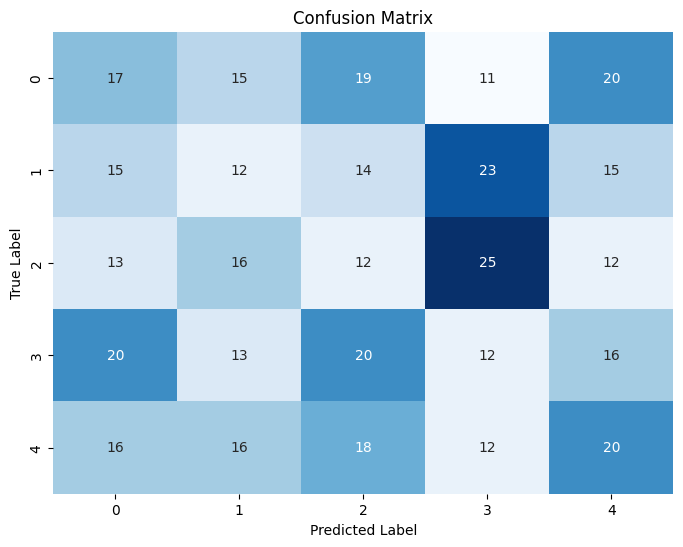

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test set
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Calculate classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


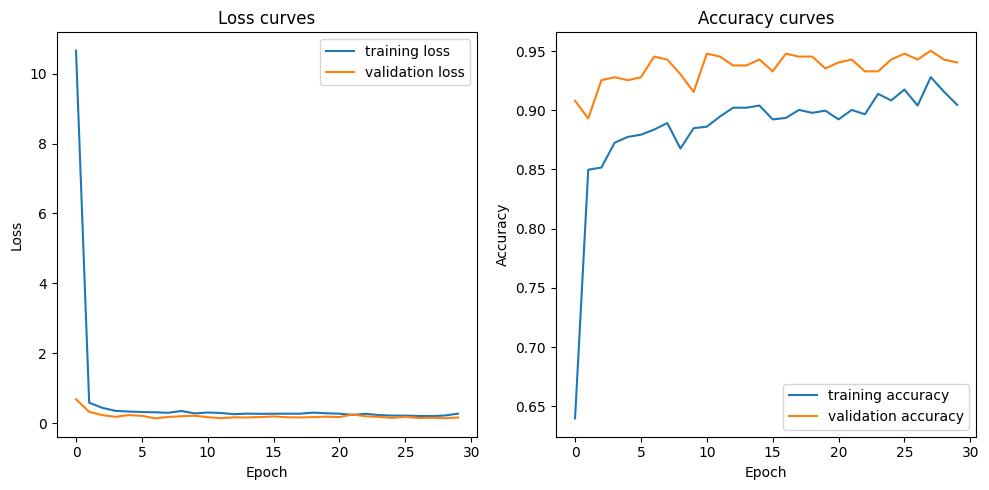

In [ ]:
import matplotlib.pyplot as plt

def plotLosses(history):
  # Create a figure and a grid of subplots with a single call
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  # Plot the loss curves on the first subplot
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_title('Loss curves')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  # Plot the accuracy curves on the second subplot
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_title('Accuracy curves')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  # Adjust the spacing between subplots
  fig.tight_layout()
  # Show the figure
  plt.show()


plotLosses(history)

Loss refers to how well your model is fitting the training data. It measures how far off the model's predictions are from the actual values. In the ideal scenario, the loss would decrease over time as the model learns from its mistakes.
Accuracy refers to how often the model makes the correct prediction. As with loss, you ideally want the accuracy to increase over time.
The graphs you’ve provided show that the model’s training accuracy is not very high, leveling out at around 70% at the 30th epoch. This could mean a number of things:

The model is underfitting the data. This means the model is too simple and hasn’t been able to learn the complexities of the training data.
The model is overfitting the data. This means the model has learned the training data too well, but it hasn't learned to generalise to unseen data.
There could be issues with your training data itself, such as noise or a lack of data.


# MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

NUM_CLASSES = 5  # Assuming 5 classes (Cat, Cheetah, Leopard, Lion, Tiger)

# Define directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/train/train'

# Define image size based on your most common size (e.g., 500x333)
IMG_SIZE = (500, 333)

# Define batch size and number of epochs
BATCH_SIZE = 32
epochs = 30

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training and Validation Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classifier on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 1624 images belonging to 5 classes.
Found 402 images belonging to 5 classes.


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/30
51/51 [==============================] - 645s 12s/step - loss: 0.5910 - accuracy: 0.7900 - val_loss: 0.3676 - val_accuracy: 0.8756
Epoch 2/30
51/51 [==============================] - 96s 2s/step - loss: 0.3206 - accuracy: 0.8904 - val_loss: 0.2472 - val_accuracy: 0.9229
Epoch 3/30
51/51 [==============================] - 96s 2s/step - loss: 0.2394 - accuracy: 0.9163 - val_loss: 0.1791 - val_accuracy: 0.9453
Epoch 4/30
51/51 [==============================] - 95s 2s/step - loss: 0.2042 - accuracy: 0.9304 - val_loss: 0.1601 - val_accuracy: 0.9502
Epoch 5/30
51/51 [==============================] - 96s 2s/step - loss: 0.1648 - accuracy: 0.9360 - val_loss: 0.1655 - val_accuracy: 0.9453
Epoch 6/30
51/51 [==============================] - 96s 2s/step - loss: 0.1857 - accuracy: 0.9280 - val_loss: 0.2457 - val_accuracy: 0.9154
Epoch 7/30
51/51 [==============================] - 93s 2s/step - loss: 0.1793 - accuracy: 0.92

In [ ]:
# Define the path to save the model
save_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsFinalModel.h5'

# Save the model
model.save(save_path)

print("Model saved to:", save_path)

NameError: name 'model' is not defined

This script demonstrates how to evaluate a model's performance on a validation set using classification metrics and visualizing the confusion matrix. Here's a breakdown of the script:

Importing Libraries:

It imports necessary libraries such as classification_report, confusion_matrix, matplotlib.pyplot, and seaborn for evaluation and visualization.
Evaluating Model:

Uses the trained model (model) to predict classes for the validation data generator (validation_generator).
The predictions are obtained using model.predict(validation_generator).
np.argmax(predictions, axis=1) is used to convert the predicted probabilities into class labels by selecting the class with the highest probability index.
Retrieves the true classes from validation_generator.classes, which contains the ground truth labels of the validation dataset.
Calculating Classification Report:

Uses classification_report from sklearn.metrics to compute and print a detailed classification report. This report includes precision, recall, F1-score, and support for each class.
Calculating Confusion Matrix:

Computes the confusion matrix using confusion_matrix from sklearn.metrics. The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions for each class.
Visualizing Confusion Matrix:

Plots the confusion matrix using seaborn.heatmap. This heatmap provides a visual representation of the confusion matrix, with annotations showing the counts in each cell.
The colormap (cmap) is set to "Blues" for better visualization, and annotations (annot=True) display the counts in each cell.

13/13 [==============================] - 21s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        82
           1       0.22      0.22      0.22        79
           2       0.23      0.23      0.23        78
           3       0.22      0.22      0.22        81
           4       0.21      0.21      0.21        82

    accuracy                           0.22       402
   macro avg       0.22      0.22      0.22       402
weighted avg       0.22      0.22      0.22       402



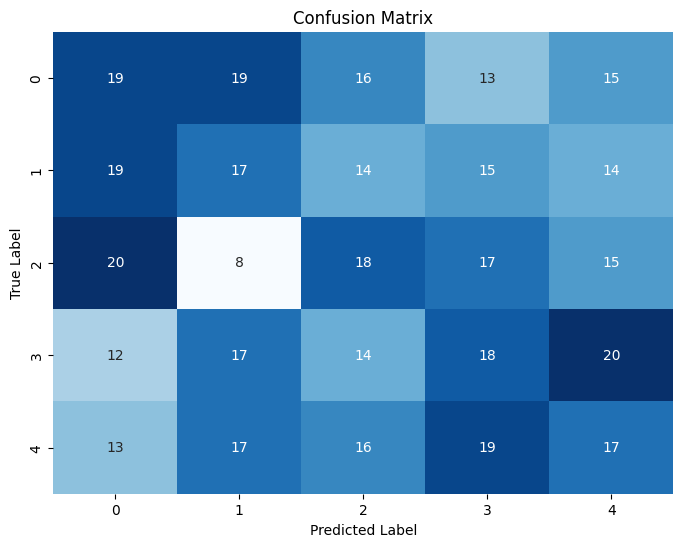

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test set
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Calculate classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


We used plotLosses(history) function to visualize the training and validation loss, as well as the training and validation accuracy, across epochs during model training. Below is a concise explanation of each part of this function:

Importing matplotlib.pyplot: This function imports the necessary library for plotting, matplotlib.pyplot, as plt.

Function Definition: Defines a function named plotLosses that takes history as input, which typically contains the training history of a model obtained after training.

Creating Subplots: Uses plt.subplots(1, 2, figsize=(10,5)) to create a figure with two subplots arranged horizontally (1 row, 2 columns) and sets the figure size to (10, 5).

Plotting Loss Curves:

Training Loss vs. Validation Loss: Plots the training loss (history.history['loss']) and validation loss (history.history['val_loss']) on the first subplot (ax1).
Sets labels, title, and legend for the subplot to make the plot clear and informative.
Plotting Accuracy Curves:

Training Accuracy vs. Validation Accuracy: Plots the training accuracy (history.history['accuracy']) and validation accuracy (history.history['val_accuracy']) on the second subplot (ax2).
Sets labels, title, and legend similar to the first subplot.
Adjusting Layout and Displaying:

Uses fig.tight_layout() to adjust the spacing between subplots for better readability.
Finally, calls plt.show() to display the figure containing both subplots.

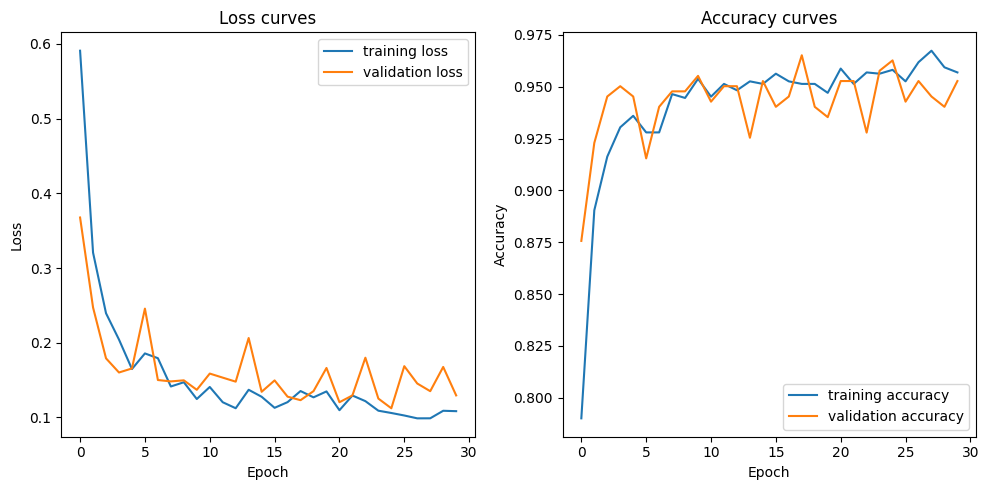

In [ ]:
import matplotlib.pyplot as plt

def plotLosses(history):
  # Create a figure and a grid of subplots with a single call
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  # Plot the loss curves on the first subplot
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_title('Loss curves')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  # Plot the accuracy curves on the second subplot
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_title('Accuracy curves')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  # Adjust the spacing between subplots
  fig.tight_layout()
  # Show the figure
  plt.show()


plotLosses(history)

Training Loss curve starts at around 0.6 and reduces slightly to 0.55 over the 30 epochs. Ideally, it should keep decreasing throughout the epochs.
Validation Loss curve starts at around 0.55 and fluctuates around that value throughout the epochs. This suggests the model may be overfitting the data.
Training Accuracy curve starts at around 0.8 and increases to 0.875 over the 30 epochs.
Validation Accuracy curve starts around 0.825 and fluctuates throughout the epochs, but remains mostly flat.
Overall, the fact that the validation loss curve is not decreasing  along with the training loss curve suggests the model may be overfitting the data. This means the model has learned the training data too well, but it hasn't learned to generalise to unseen data.

This script performs the following tasks:

Loading the Trained Model:

It loads a pre-trained model from the specified path (model_path).
Defining Preprocessing Function:

The preprocess_image function is defined to load and preprocess an image from the specified path (img_path), resizing it to the target size (IMG_SIZE) and normalizing pixel values to the range [0,1].
Iterating Through Images:

It iterates through the images in the specified directory (new_images_dir).
For each image file (filename) ending with ".jpg" or ".png", it preprocesses the image using the preprocess_image function and makes predictions using the loaded model.
It appends the predicted class index (predicted_class) and the image ID (extracted from filename) to lists (predictions and image_ids, respectively).
Writing Predictions to CSV File:

It writes the collected predictions and image IDs to a CSV file (output_csv_file), where each row contains an image ID and its predicted class index.
The CSV file is created with column headers 'id' and 'predicted_class'.
Displaying Output:

After processing all images and writing predictions to the CSV file, it prints a message indicating the location where predictions are saved.

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Load the trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsFinalModel.h5'  # Path to your trained model
model = tf.keras.models.load_model(model_path)

# Path to the directory containing the new images
new_images_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/test/test'

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE[0], IMG_SIZE[1]))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0,1]
    return img_array

# List to store predictions
predictions = []

# List to store image IDs
image_ids = []

# Iterate through the images in the directory
for filename in os.listdir(new_images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Preprocess the image
        img_path = os.path.join(new_images_dir, filename)
        img_array = preprocess_image(img_path)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Store prediction and image ID
        predictions.append(predicted_class)
        image_ids.append(filename.split('.')[0])  # Extracting image ID from filename

# Write predictions to a CSV file
output_csv_file = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Deeplearning/predictionsFinal.csv'
with open(output_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'predicted_class'])
    for i in range(len(predictions)):
        writer.writerow([image_ids[i], predictions[i]])

print("Predictions saved to", output_csv_file)


1/1 [==============================] - 0s 24ms/step
Predictions saved to /content/drive/My Drive/Colab Notebooks/ML project/dl-challenge-thomasmore-2023-2024/predictionsFinal.csv
